In [3]:
IMAGE_DIR_PATH = 'E:\\chicken_image\\kaggle-antoreepjana-animals-detection-images-dataset-1050\\test-274'
import supervision as sv

image_paths = sv.list_files_with_extensions(
    directory=IMAGE_DIR_PATH,
    extensions=["png", "jpg", "jpeg"])

print('image count:', len(image_paths))

image count: 137


In [12]:
from autodistill.detection import CaptionOntology
ontology = CaptionOntology({
    "chicken": "chicken",
    "text": "text",
})
from autodistill_grounded_sam import GroundedSAM
base_model = GroundedSAM(ontology=ontology)

import cv2
# test_image = "E:\\chicken_image\\kaggle-antoreepjana-animals-detection-images-dataset-1050\\test-274\\0a8a5aa471796fd5.jpg"
test_image = "E:\\OneDrive - The University of Technology\\chicken_image\\roboflow-charan-7q0md-healthy-and-sick-chicken-detection-kavqw-2995\\train-2618\\images-2618\\15_jpg.rf.ab93c23099409f34f155a6e45d273baf.jpg"
image = cv2.imread(test_image)
detections = base_model.predict(test_image)
print(detections[0])

trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None


Detections(xyxy=array([[2.7252197e-02, 4.0305756e+01, 4.1602725e+02, 4.1614896e+02]],
      dtype=float32), mask=array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]]), confidence=array([0.5147095], dtype=float32), class_id=array([0], dtype=int64), tracker_id=None, data={})


BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


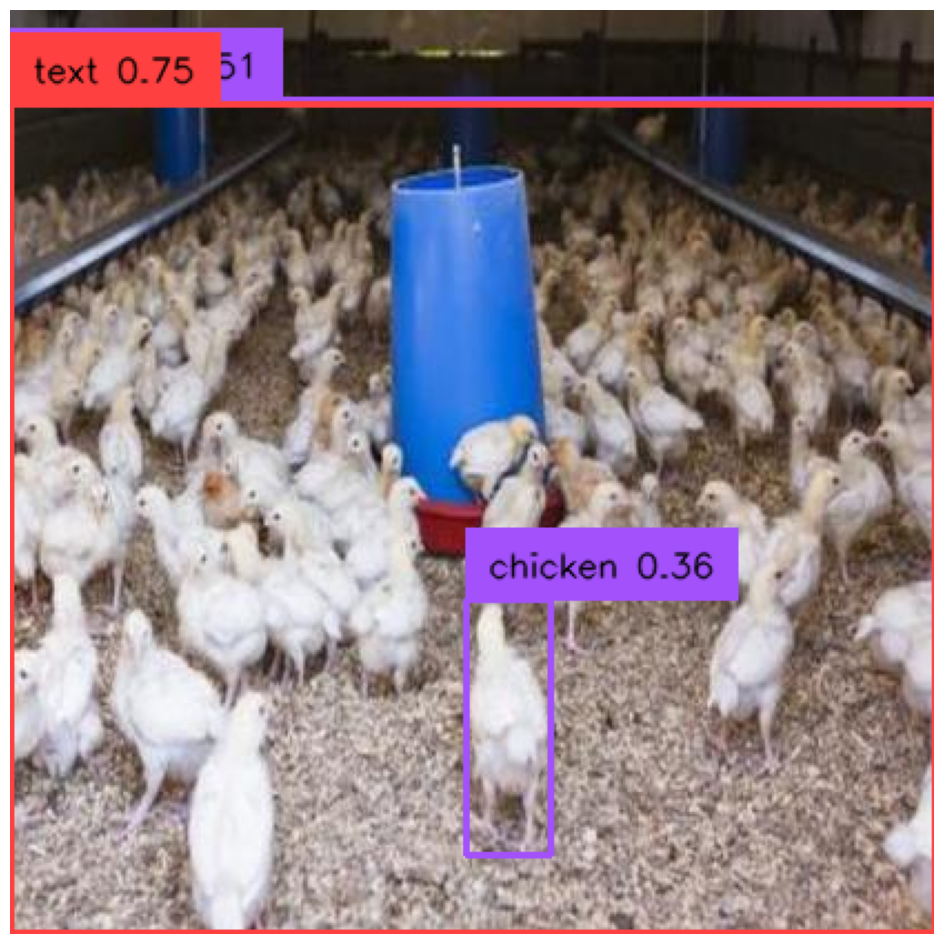

In [13]:
box_annotator = sv.BoxAnnotator()
classes = ["chicken", "text"]
labels = [f"{classes[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _, _ in detections]

annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

sv.plot_image(annotated_frame)

In [14]:
DATASET_DIR_PATH = 'E:\\chicken_image\\kaggle-antoreepjana-animals-detection-images-dataset-1050'
IMAGE_DIR_PATH = 'E:\\OneDrive - The University of Technology\\chicken_image\\kaggle-ksvbist-chicken-1573\\images-1573\\val-173'
dataset = base_model.label(input_folder=IMAGE_DIR_PATH, extension=".jpg", output_folder=IMAGE_DIR_PATH)

Labeling E:\OneDrive - The University of Technology\chicken_image\kaggle-ksvbist-chicken-1573\images-1573\val-173\2 (430).jpg:   0%|          | 0/173 [00:00<?, ?it/s]The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None
Labeling E:\OneDrive - The University of Technology\chicken_image\kaggle-ksvbist-chicken-1573\images-1573\val-173\2 (444).jpg:   8%|▊         | 14/173 [33:36<6:21:38, 144.02s/it]


KeyboardInterrupt: 